In [18]:
from matplotlib import pyplot as plt

In [ ]:
#PCA is used for data reduction and feature extraction method to represent data for better analysis which helps in understanding
#data better than the raw data given to us
#PCA used for images can help us by changing the pixel count of all images in different methods for better processing it

people.images.shape:(3023, 87, 65)
Number of classes:62


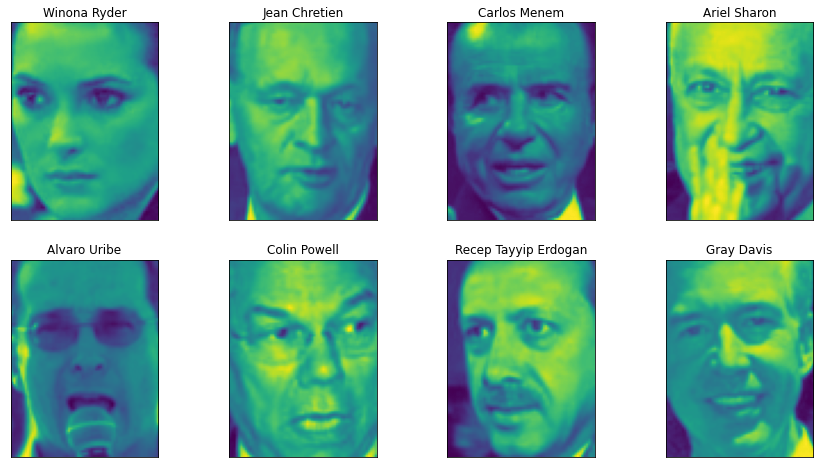

In [19]:
from sklearn.datasets import fetch_lfw_people

people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

fig, axes = plt.subplots(2,4,figsize=(15,8),subplot_kw={'xticks':(),'yticks':()})

for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])
print("people.images.shape:{}".format(people.images.shape))
print("Number of classes:{}".format(len(people.target_names)))

In [ ]:
#above output= there are 3023 images, each of 87X65 pixel large, belonging to 62 different people

In [20]:
import numpy as np
counts = np.bincount(people.target)
for i,(count, name) in enumerate(zip(counts,people.target_names)):
    print("{0:25} {1:3}".format(name, count), end='   ')
    if (i+1)%3==0:
        print()

Alejandro Toledo           39   Alvaro Uribe               35   Amelie Mauresmo            21   
Andre Agassi               36   Angelina Jolie             20   Ariel Sharon               77   
Arnold Schwarzenegger      42   Atal Bihari Vajpayee       24   Bill Clinton               29   
Carlos Menem               21   Colin Powell              236   David Beckham              31   
Donald Rumsfeld           121   George Robertson           22   George W Bush             530   
Gerhard Schroeder         109   Gloria Macapagal Arroyo    44   Gray Davis                 26   
Guillermo Coria            30   Hamid Karzai               22   Hans Blix                  39   
Hugo Chavez                71   Igor Ivanov                20   Jack Straw                 28   
Jacques Chirac             52   Jean Chretien              55   Jennifer Aniston           21   
Jennifer Capriati          42   Jennifer Lopez             21   Jeremy Greenstock          24   
Jiang Zemin                20 

In [ ]:
# here the data is skewed so to make it less skewed we only take 50 images of each person(otherwise feature extraction would
#be overwhelmed by Gorge Bush or others)

In [21]:
mask=np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1

X_people=people.data[mask]
y_people=people.target[mask]

#scale the grayscale values to be between 0 and 1
#instead of 0 and 255 for better numeric stability
X_people=X_people / 255

In [ ]:
#Here, using one-neighbor-classifier is a simple solution that looks for the most similar face image to the face you are classifying

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X_people,y_people,stratify=y_people,random_state=0)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

print("Test set score of 1-nn: {:.2f}".format(knn.score(X_test,y_test)))

Test set score of 1-nn: 0.23


In [ ]:
#we obtained 23% accuracy which is not bad for 62-class classification problem which is also not great
#here comes PCA which in which we enable whitening option of PCA,which rescales the principal component to have same scale
#whitening PCA not only rotates the data, but also rescale it as it becomes a circle panel instead of an ellipse

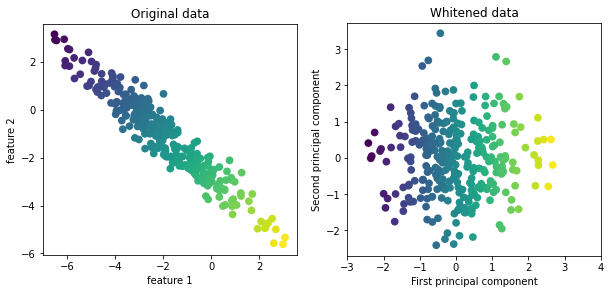

In [37]:
mglearn.plots.plot_pca_whitening()

In [ ]:
#We fit the PCA object to training data and extract the first 100 principle components.
#Then transfrom the training and test data.

In [30]:
from sklearn.decomposition import PCA

pca=PCA(n_components=100,whiten=True,random_state=0).fit(X_train)
X_train_pca=pca.transform(X_train)
X_test_pca=pca.transform(X_test)

print("X_train_pca.shape: {}".format(X_train_pca.shape))

X_train_pca.shape: (1547, 100)


In [ ]:
#The new data has 100 features, the first 100 principle components
#we can use the new representation to classify our images using one-neighbors-classifier

In [33]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca,y_train)

print("Test set accuracy: {:.2f}".format(knn.score(X_test_pca,y_test)))

Test set accuracy: 0.31


In [ ]:
#Our accuracy improved quite significantly to 31%